In [10]:
print(__doc__)

import numpy as np
import scipy as scipy
import sys 
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, mixture
from itertools import cycle, islice

Automatically created module for IPython interactive environment


In [0]:
# x2x=np.random.randn(80,1)+12
# x2y=np.random.randn(80,1)
# x2=np.column_stack((x2x,x2y))
# print(x2x)
# print(x2)

# a = np.array((1,2,3))
# b = np.array((2,3,4))
# print(a)
# print(b)
# print(np.column_stack((a,b)))

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
#https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
np.random.seed(0)
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
x,y = noisy_circles 
X=x.copy()
X = StandardScaler().fit_transform(X)

In [0]:
def GenerateData():
    x1=np.random.randn(50,2)
#     x2x=np.random.randn(80,1)+12
#     x2y=np.random.randn(80,1)
#     x2=np.column_stack((x2x,x2y))
    x2=np.random.randn(70,2)+8
    x3=np.random.randn(100,2)+8
    x4=np.random.randn(120,2)+15
    z=np.concatenate((x1,x2,x3,x4))
    return z




In [0]:
# centers = [[1, 2], [1, 3], [1, 4],[1, 6],[2, 7],[3, 8],[3, 9],[8, 9],[8, 1]]
# X, labels_true = make_blobs(n_samples=700, centers=centers, cluster_std=0.4,
#                             random_state=0)

# X = StandardScaler().fit_transform(X)
# print (X)
#Data=GenerateData()
# noise=scipy.rand(50,3)*20 -3
 
# X=np.concatenate((Data,noise))
#X = StandardScaler().fit_transform(X)

Estimated number of clusters: 2
Estimated number of noise points: 0


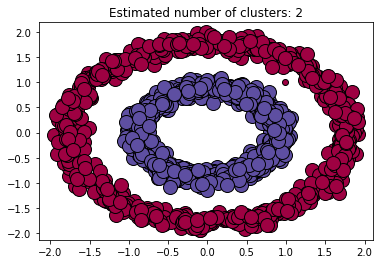

In [15]:


# #############################################################################
# Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1]]
# centers = [[1, 2], [1, 3], [1, 4],[1, 6],[2, 7],[3, 8],[3, 9],[8, 9],[8, 1]]
# X, labels_true = make_blobs(n_samples=700, centers=centers, cluster_std=0.4,
#                             random_state=0)

# X = StandardScaler().fit_transform(X)
# print (X)
#Data=GenerateData()
# noise=scipy.rand(50,3)*20 -3
 
# X=np.concatenate((Data,noise))
#X = StandardScaler().fit_transform(X)
#print(X)
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

core_samples_mask[db.core_sample_indices_] = True
# print(core_samples_mask)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) #cluster terbentuk 4 ( label cluster {0, 1, 2, -1} ). label -1 artinya noise. 
n_noise_ = list(labels).count(-1)

#print(((labels)))

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1] #cmyk untuk warna hitam

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
   # print(xy)
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)


plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()